### Generating the data

In [22]:
from sklearn.datasets.samples_generator import make_regression
X, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)
m = 200

### Visualize the data

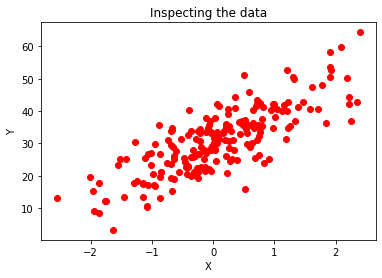

In [23]:
from matplotlib import pyplot as plt
plt.scatter(X, y, color="r", marker='o')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Inspecting the data")
plt.show()

### Linear model

In [24]:
import numpy as np
def h(X, w):
    return (w[1]*np.array(X[:,0]) + w[0])

### Cost function

In [25]:
def cost(w, X, y):
    return (0.5/m) * np.sum(np.square(h(X,w)-np.array(y)))

### Gradient descent

In [26]:
def grad(w,X,y):
    g = [0]*2
    g[0] = (1/m) * np.sum(h(X,w)-np.array(y))
    g[1] = (1/m) * np.sum((h(X,w)-np.array(y))*np.array(X[:,0]))
    return g

In [27]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev, X, y))
    j = 0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr * grad(w_prev, X, y)[0]
        w1 = w_prev[1] - lr * grad(w_prev, X, y)[1]
        w_new = [w0, w1]
        print(w_new)
        print(cost(w_new, X, y))
        if(w_new[0] - w_prev[0]) ** 2 + (w_new[1] - w_prev[1]) ** 2 <= pow(10,-6):
            return w_new
        if j>500:
            return w_new
        j += 1

### Initializing parameters

In [32]:
w = [0, -1]

### Training the model

In [29]:
w = descent(w, w, .1)
print(w)

[0, -1]
540.5360663843456
[3.0956308633447547, 0.11442770988081663]
437.91139336428444
[5.873446610978822, 1.1023454281382854]
355.5039050187037
[8.366165526017987, 1.9778657783247602]
289.3267499184995
[10.603129563187093, 2.753547324958939]
236.1799750745718
[12.610653489037027, 3.440564026385428]
193.49509649539323
[14.412337853388406, 4.048856351454087]
159.2103901995911
[16.0293495446536, 4.587266032213945]
131.6708284668908
[17.480673291820082, 5.063656213710697]
109.54778810165583
[18.7833371265594, 5.485018573380515]
91.77462156224563
[19.952614505935692, 5.857568814053481]
77.49495508304668
[21.002205515744066, 6.186831784078626]
66.02119816099949
[21.944399323224108, 6.4777173436470505]
56.801246289923824
[22.79021982273288, 6.734587976310905]
49.39175789964725
[23.549556216205993, 6.961319037445921]
43.436706577550574
[24.23128008944935, 7.1613524356181975]
38.6501664442448
[24.843350383306017, 7.337744457271138]
34.802494555336104
[25.39290751357782, 7.493208368754656]
31.7

### Visualizing the result

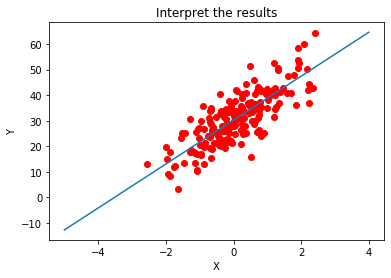

In [30]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)
def my_formula(x):
    return w[0]+w[1]*x
plt.scatter(X, y, c="r", marker="o")
graph(my_formula, range(-5, 5))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Interpret the results")
plt.show()